In [1]:
# working with dataframes, series and arrayes
import pandas as pd
import numpy as np

# dataViz
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#import pandas_bokeh
#pandas_bokeh.output_notebook()

# missing data viz
import missingno as msno

# plot maps
from shapely.geometry import Point, Polygon
#import plotly.figure_factory as ff
import geopandas as gpd

# Import Data

- main data
- separate file for additional info on individual airports:
    - longitude and latitude
    - elevation_ft
    - type (small, medium, large airport etc.)

In [2]:
data = pd.read_excel('./data/faa_wildlife_strikes.xlsx')

In [3]:
airport_codes = pd.read_csv('data/airport-codes.csv')

In [4]:
data.head(1)

,Airport: Code,Airport: Name,Origin State,Origin State Code,Country,Aircraft: Type,Aircraft: Number of engines,Collision Date and Time,When: Time of day,When: Phase of flight,...,Days,Feet above ground,Miles from airport,Wildlife: Animal Category,Wildlife: Species Order,Wildlife: Species Group,Wildlife: Species,Wildlife: Species ID,Number of Strikes,Record ID
0,KAAF,APALACHICOLA REGIONAL ARPT,Florida,FL,United States,NaN,NaN,2012-09-20 19:30:00,NaN,Take-off run,...,NaN,0.0,NaN,Terrestrial Mammals,Canids,"Wolves, Dogs, Foxes, Coyote",Domestic dog,1F12,1,17459


In [5]:
airport_codes.head(1)

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates
0,00A,heliport,Total Rf Heliport,11.0,NaN,US,US-PA,Bensalem,00A,NaN,00A,"-74.93360137939453, 40.07080078125"


# Merge Data Frames

In [6]:
airport_codes.rename(columns={'ident':'Airport: Code'}, inplace=True)
airport_codes.head(1)

,Airport: Code,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates
0,00A,heliport,Total Rf Heliport,11.0,NaN,US,US-PA,Bensalem,00A,NaN,00A,"-74.93360137939453, 40.07080078125"


In [7]:
data = data.merge(airport_codes[['Airport: Code', 'type', 'elevation_ft', 'coordinates']], on = 'Airport: Code', how = 'left')
data.head(1)

,Airport: Code,Airport: Name,Origin State,Origin State Code,Country,Aircraft: Type,Aircraft: Number of engines,Collision Date and Time,When: Time of day,When: Phase of flight,...,Wildlife: Animal Category,Wildlife: Species Order,Wildlife: Species Group,Wildlife: Species,Wildlife: Species ID,Number of Strikes,Record ID,type,elevation_ft,coordinates
0,KAAF,APALACHICOLA REGIONAL ARPT,Florida,FL,United States,NaN,NaN,2012-09-20 19:30:00,NaN,Take-off run,...,Terrestrial Mammals,Canids,"Wolves, Dogs, Foxes, Coyote",Domestic dog,1F12,1,17459,small_airport,20.0,"-85.02749634, 29.72750092"


# Select Variables for Analysis

In [8]:
data.columns

Index(['Airport: Code', 'Airport: Name', 'Origin State', 'Origin State Code',
       'Country', 'Aircraft: Type', 'Aircraft: Number of engines',
       'Collision Date and Time', 'When: Time of day', 'When: Phase of flight',
       'Effect: Amount of damage (detailed)', 'Effect: Impact to flight',
       'Effect: Indicated Damage',
       'Cost: Aircraft time out of service (hours)', 'Cost: Total $', 'Days',
       'Feet above ground', 'Miles from airport', 'Wildlife: Animal Category',
       'Wildlife: Species Order', 'Wildlife: Species Group',
       'Wildlife: Species', 'Wildlife: Species ID', 'Number of Strikes',
       'Record ID', 'type', 'elevation_ft', 'coordinates'],
      dtype='object')

### Select most relevant variabled for further analysis

In [9]:
columns = ['Airport: Code', 'Aircraft: Number of engines', 'When: Time of day', 'When: Phase of flight',
       'Effect: Amount of damage (detailed)', 'Effect: Impact to flight', 'Effect: Indicated Damage', 'Cost: Total $', 'Feet above ground', 'Miles from airport', 'Wildlife: Animal Category',
       'Wildlife: Species Order', 'type', 'elevation_ft']

### Subset data frame

In [10]:
data2 = data[columns]
data2.head(1)

,Airport: Code,Aircraft: Number of engines,When: Time of day,When: Phase of flight,Effect: Amount of damage (detailed),Effect: Impact to flight,Effect: Indicated Damage,Cost: Total $,Feet above ground,Miles from airport,Wildlife: Animal Category,Wildlife: Species Order,type,elevation_ft
0,KAAF,NaN,NaN,Take-off run,None,None,No damage,0,0.0,NaN,Terrestrial Mammals,Canids,small_airport,20.0


# Data Exploration and Cleaning

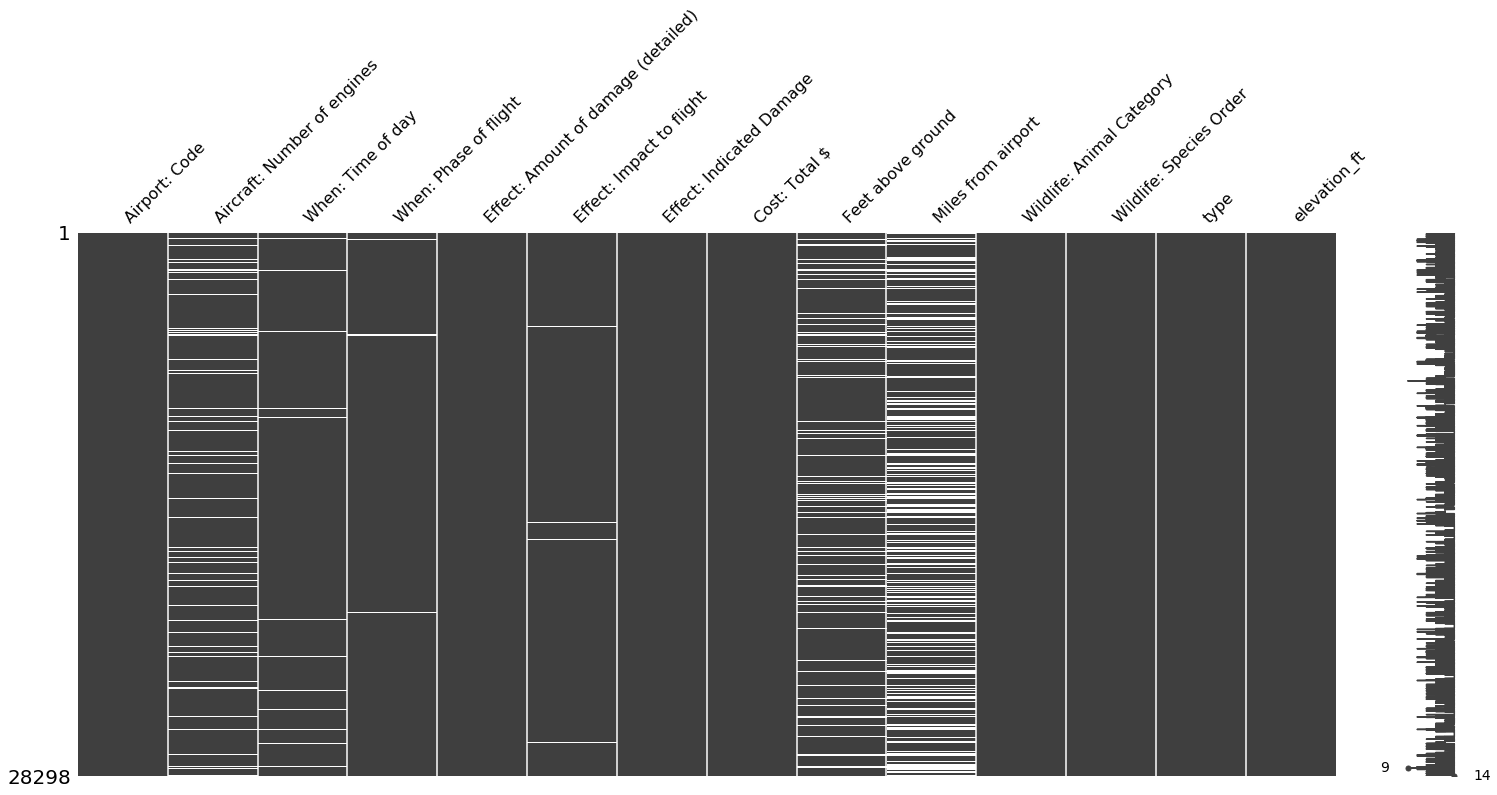

In [11]:
msno.matrix(data2);

In [12]:
len(data2[data2['Miles from airport']==0])

18207

In [13]:
#data2['Miles from airport'].value_counts()

In [14]:
data2['Miles from airport'].value_counts().sum() - len(data2[data2['Miles from airport']==0])

1600

### Fill missing data with modes

In [15]:
data2[columns].mode()

,Airport: Code,Aircraft: Number of engines,When: Time of day,When: Phase of flight,Effect: Amount of damage (detailed),Effect: Impact to flight,Effect: Indicated Damage,Cost: Total $,Feet above ground,Miles from airport,Wildlife: Animal Category,Wildlife: Species Order,type,elevation_ft
0,KDFW,2.0,Day,Approach,None,None,No damage,0,0.0,0.0,Birds,Perching Birds,large_airport,13.0


In [16]:
data_mode = pd.DataFrame()
for column in columns:
    data_mode[column] = data2[column].fillna(data2[column].mode()[0])

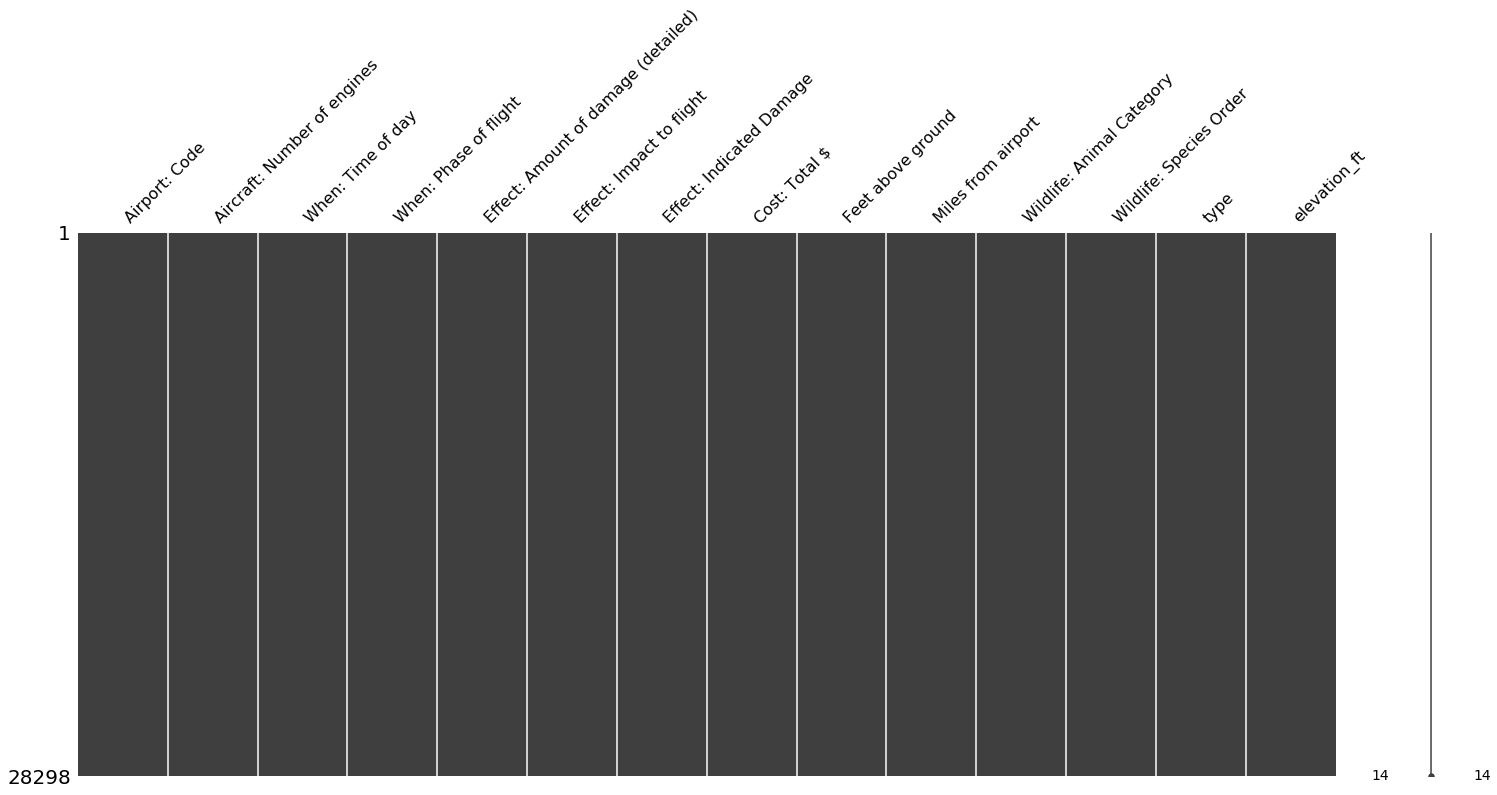

In [18]:
msno.matrix(data_mode);

In [19]:
data_mode.isna().sum()

Airport: Code                          0
Aircraft: Number of engines            0
When: Time of day                      0
When: Phase of flight                  0
Effect: Amount of damage (detailed)    0
Effect: Impact to flight               0
Effect: Indicated Damage               0
Cost: Total $                          0
Feet above ground                      0
Miles from airport                     0
Wildlife: Animal Category              0
Wildlife: Species Order                0
type                                   0
elevation_ft                           0
dtype: int64

### Check for correllations

In [20]:
data_mode.corr()

,Aircraft: Number of engines,Cost: Total $,Feet above ground,Miles from airport,elevation_ft
Aircraft: Number of engines,1.000000,0.010406,0.003448,-0.002255,-0.012653
Cost: Total $,0.010406,1.000000,0.038569,0.024309,0.004652
Feet above ground,0.003448,0.038569,1.000000,0.533797,-0.021591
Miles from airport,-0.002255,0.024309,0.533797,1.000000,-0.023237
elevation_ft,-0.012653,0.004652,-0.021591,-0.023237,1.000000


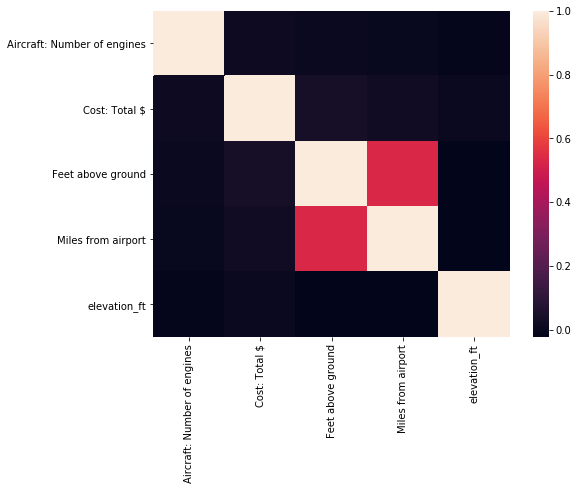

In [21]:
corr = data_mode.corr()
fig, ax = plt.subplots(figsize=(8,6)) 
sns.heatmap(corr, ax=ax);

# Unsupervised Learning

### Create Dummy Values

In [29]:
data_dummies = pd.get_dummies(data_mode, columns=['Aircraft: Number of engines', 
                                                 'When: Time of day', 
                                                  'When: Phase of flight',
                                                 'Effect: Amount of damage (detailed)',
                                                 'Effect: Impact to flight', 
                                                 'Effect: Indicated Damage', 
                                                 'Wildlife: Species Order', 
                                                 'type'], drop_first=True)

In [30]:
data_dummies.head(1)

,Airport: Code,Cost: Total $,Feet above ground,Miles from airport,Wildlife: Animal Category,elevation_ft,Aircraft: Number of engines_2.0,Aircraft: Number of engines_3.0,Aircraft: Number of engines_4.0,When: Time of day_Day,...,Wildlife: Species Order_Pigeons and Doves,"Wildlife: Species Order_Pigs, Boar","Wildlife: Species Order_Rabbits, Hares",Wildlife: Species Order_Rodents,Wildlife: Species Order_Storks,"Wildlife: Species Order_Turtles, Tortoises, Terrapins","Wildlife: Species Order_Woodpeckers, Sapsuckers, Flickers",type_large_airport,type_medium_airport,type_small_airport
0,KAAF,0,0.0,0.0,Terrestrial Mammals,20.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [31]:
data_dummies_drop = data_dummies.drop(columns = ['Airport: Code', 'Wildlife: Animal Category'])

In [32]:
data_dummies_drop.head(1)

,Cost: Total $,Feet above ground,Miles from airport,elevation_ft,Aircraft: Number of engines_2.0,Aircraft: Number of engines_3.0,Aircraft: Number of engines_4.0,When: Time of day_Day,When: Time of day_Dusk,When: Time of day_Night,...,Wildlife: Species Order_Pigeons and Doves,"Wildlife: Species Order_Pigs, Boar","Wildlife: Species Order_Rabbits, Hares",Wildlife: Species Order_Rodents,Wildlife: Species Order_Storks,"Wildlife: Species Order_Turtles, Tortoises, Terrapins","Wildlife: Species Order_Woodpeckers, Sapsuckers, Flickers",type_large_airport,type_medium_airport,type_small_airport
0,0,0.0,0.0,20.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


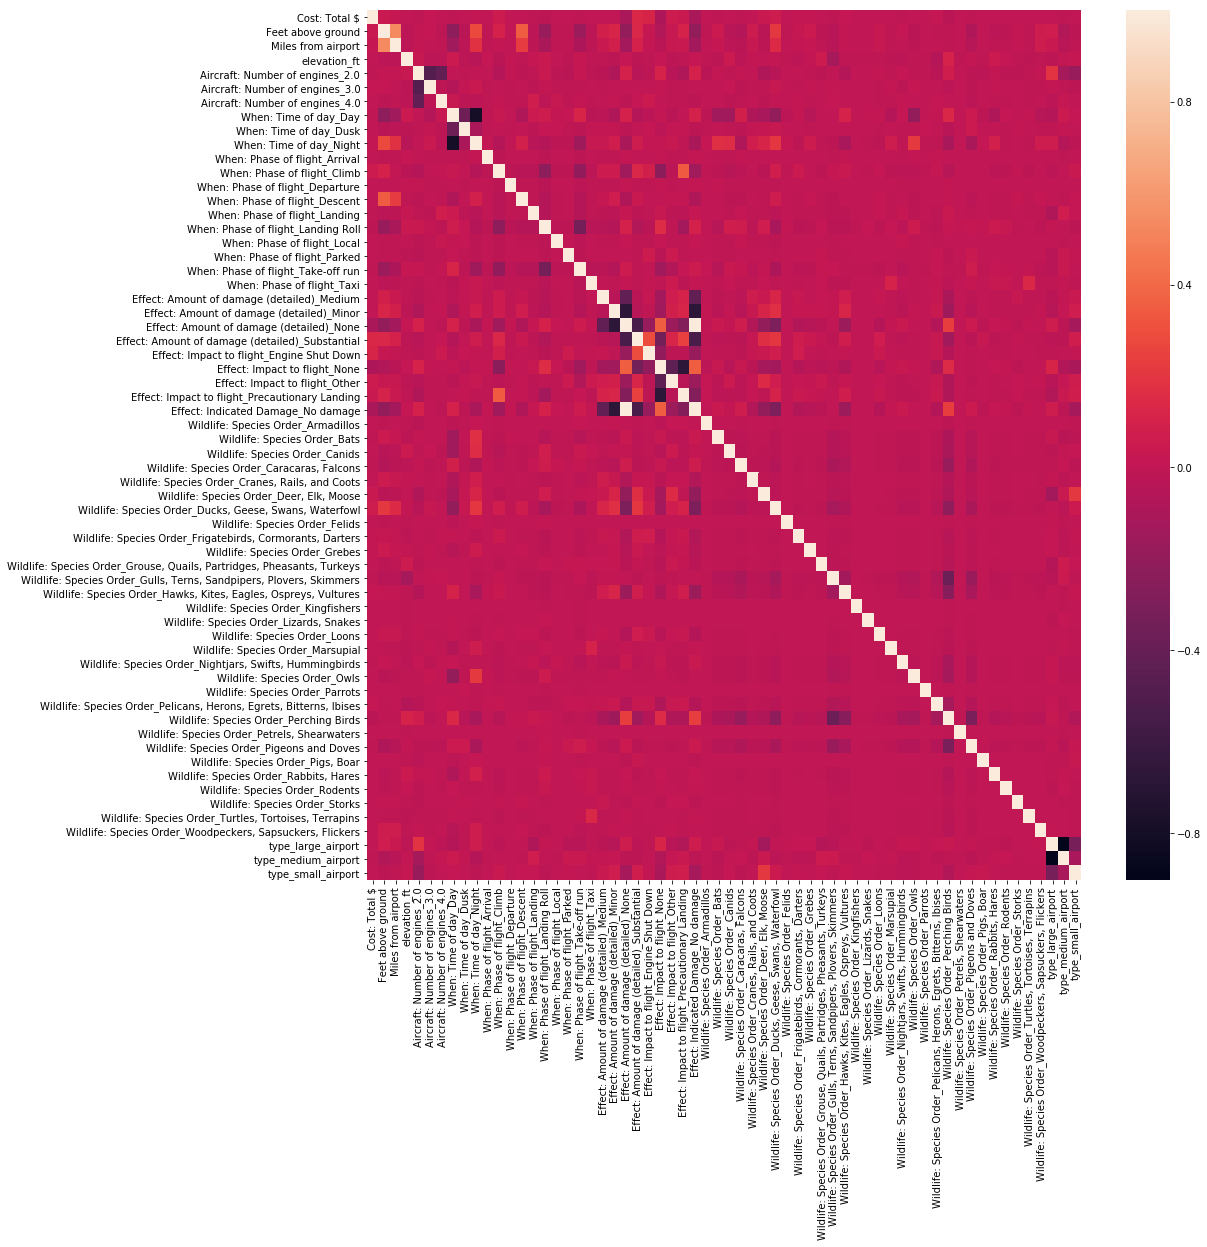

In [33]:
corr = data_dummies_drop.corr()
fig, ax = plt.subplots(figsize=(16,16)) 
sns.heatmap(corr, ax=ax);

### Normalize data

In [34]:
from sklearn.preprocessing import quantile_transform
data_dummies_drop_normalized = quantile_transform(data_dummies_drop, n_quantiles = 10, random_state = 0, copy=True, output_distribution = 'normal')

In [35]:
data_dummies_drop_normalized = pd.DataFrame(data_dummies_drop_normalized)
data_dummies_drop_normalized.columns = data_dummies_drop.columns
data_dummies_drop_normalized.head(1)

,Cost: Total $,Feet above ground,Miles from airport,elevation_ft,Aircraft: Number of engines_2.0,Aircraft: Number of engines_3.0,Aircraft: Number of engines_4.0,When: Time of day_Day,When: Time of day_Dusk,When: Time of day_Night,...,Wildlife: Species Order_Pigeons and Doves,"Wildlife: Species Order_Pigs, Boar","Wildlife: Species Order_Rabbits, Hares",Wildlife: Species Order_Rodents,Wildlife: Species Order_Storks,"Wildlife: Species Order_Turtles, Tortoises, Terrapins","Wildlife: Species Order_Woodpeckers, Sapsuckers, Flickers",type_large_airport,type_medium_airport,type_small_airport
0,-5.199338,-5.199338,-5.199338,-1.134917,5.199338,-5.199338,-5.199338,5.199338,-5.199338,-5.199338,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,5.199338


### K-means clustering

In [36]:
from sklearn.cluster import KMeans

In [37]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(data_dummies_drop_normalized)

In [38]:
data_clusters = data_dummies_drop_normalized.copy()
data_clusters['cluster'] = kmeans.labels_
len(data_clusters['cluster'].unique())

5

In [39]:
data_clusters['cluster'].value_counts()

0    8328
4    7592
1    5177
3    4099
2    3102
Name: cluster, dtype: int64

### Exploration and vizualization of clusters

In [40]:
data_clusters2 = data_clusters.pivot_table(index = 'cluster', aggfunc = np.mean)
data_clusters2

,Aircraft: Number of engines_2.0,Aircraft: Number of engines_3.0,Aircraft: Number of engines_4.0,Cost: Total $,Effect: Amount of damage (detailed)_Medium,Effect: Amount of damage (detailed)_Minor,Effect: Amount of damage (detailed)_None,Effect: Amount of damage (detailed)_Substantial,Effect: Impact to flight_Engine Shut Down,Effect: Impact to flight_None,...,"Wildlife: Species Order_Pigs, Boar","Wildlife: Species Order_Rabbits, Hares",Wildlife: Species Order_Rodents,Wildlife: Species Order_Storks,"Wildlife: Species Order_Turtles, Tortoises, Terrapins","Wildlife: Species Order_Woodpeckers, Sapsuckers, Flickers",elevation_ft,type_large_airport,type_medium_airport,type_small_airport
cluster,,,,,,,,,,,,,,,,,,,,,
0,4.526321,-5.030771,-5.043258,-5.106059,-5.199338,-5.199338,5.199338,-5.199338,-5.191846,4.324041,...,-5.199338,-5.176862,-5.161878,-5.194343,-5.175613,-5.181857,-0.063958,4.599990,-5.199338,-4.644941
1,3.853556,-5.002492,-4.950268,-5.082768,-5.193312,-5.199338,5.191303,-5.197329,-5.181260,4.086557,...,-5.199338,-5.183269,-5.163182,-5.199338,-5.185277,-5.193312,0.127109,-5.199338,5.199338,-5.199338
2,3.590258,-5.001555,-4.991498,-2.920128,-3.187988,-0.124033,-5.195985,-2.001292,-4.766898,0.817949,...,-5.195985,-5.189281,-5.192633,-5.189281,-5.199338,-5.179224,-0.084607,1.558796,-2.624811,-4.143379
3,4.524527,-4.831490,-5.123231,-5.042713,-5.199338,-5.199338,5.199338,-5.199338,-5.194264,4.691961,...,-5.199338,-5.011608,-5.186653,-5.199338,-5.194264,-5.120694,-0.131134,3.304287,-3.466648,-5.036977
4,4.763777,-5.018539,-5.092502,-5.129151,-5.191119,-5.199338,5.191119,-5.199338,-5.196598,4.828152,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,0.180060,4.859655,-5.199338,-4.861025


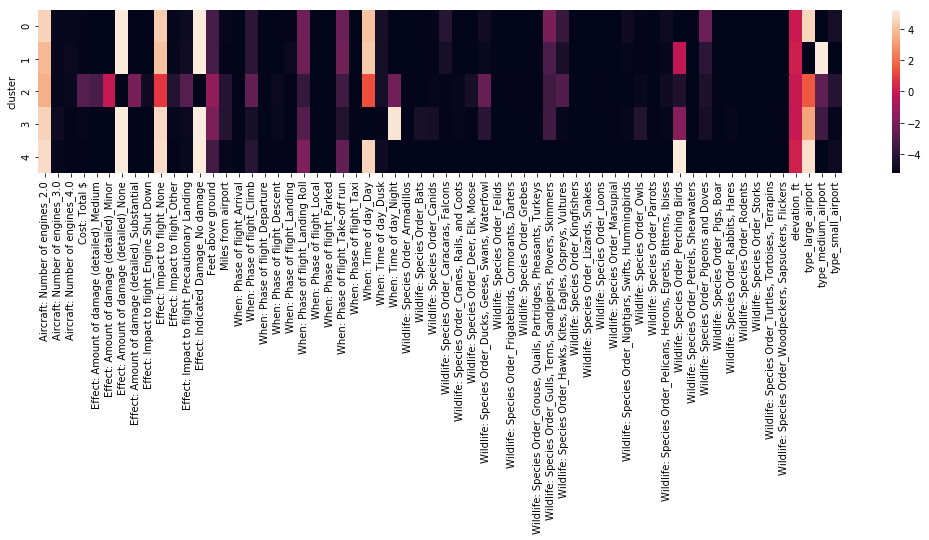

In [41]:
fig, ax = plt.subplots(figsize=(18,3)) 
sns.heatmap(data_clusters2, ax=ax);

In [42]:
data_mode['clusters'] = kmeans.labels_
data_mode.pivot_table(index=['clusters'], columns=[], aggfunc=np.mean)

,Aircraft: Number of engines,Cost: Total $,Feet above ground,Miles from airport,elevation_ft
clusters,,,,,
0,2.012728,86.435759,133.866114,0.113491,700.127642
1,1.980297,53.461464,83.153950,0.035996,847.492370
2,1.943262,103394.587685,876.383301,1.122711,758.446809
3,2.027812,79.293974,795.798000,0.999573,678.988046
4,2.023709,14.389226,118.804663,0.092196,1101.031612


In [43]:
data_mode.pivot_table(index=['clusters'], columns=[], aggfunc=np.std)

,Aircraft: Number of engines,Cost: Total $,Feet above ground,Miles from airport,elevation_ft
clusters,,,,,
0,0.331061,4016.460916,558.121703,0.954502,1153.747440
1,0.448247,1399.367853,380.879078,0.614609,1278.899696
2,0.459945,939022.084598,1753.916852,4.066609,1291.666045
3,0.293425,2427.691885,1584.474771,3.512028,1144.833131
4,0.268618,350.869317,585.981407,1.422549,1631.541905


# Supervised Learning: Principal Component Analysis for Visualization

In [44]:
pca_data = data_dummies_drop_normalized.copy()

In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(pca_data)

result = pd.DataFrame(pca.fit_transform(pca_data))

result['cluster'] = kmeans.labels_

### Visualization

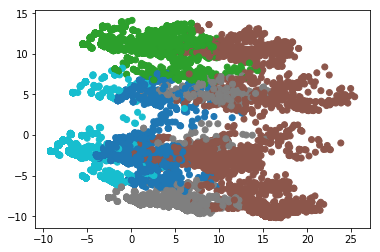

In [85]:
cmap = plt.cm.tab10

plt.scatter(result[0], result[1], c=result['cluster'], cmap=plt.cm.tab10);
my_dpi = 96
plt.savefig('figures/pca2D', dpi=my_dpi * 3, bbox_inches='tight', cmap=cmap)

In [49]:
from mpl_toolkits.mplot3d import Axes3D

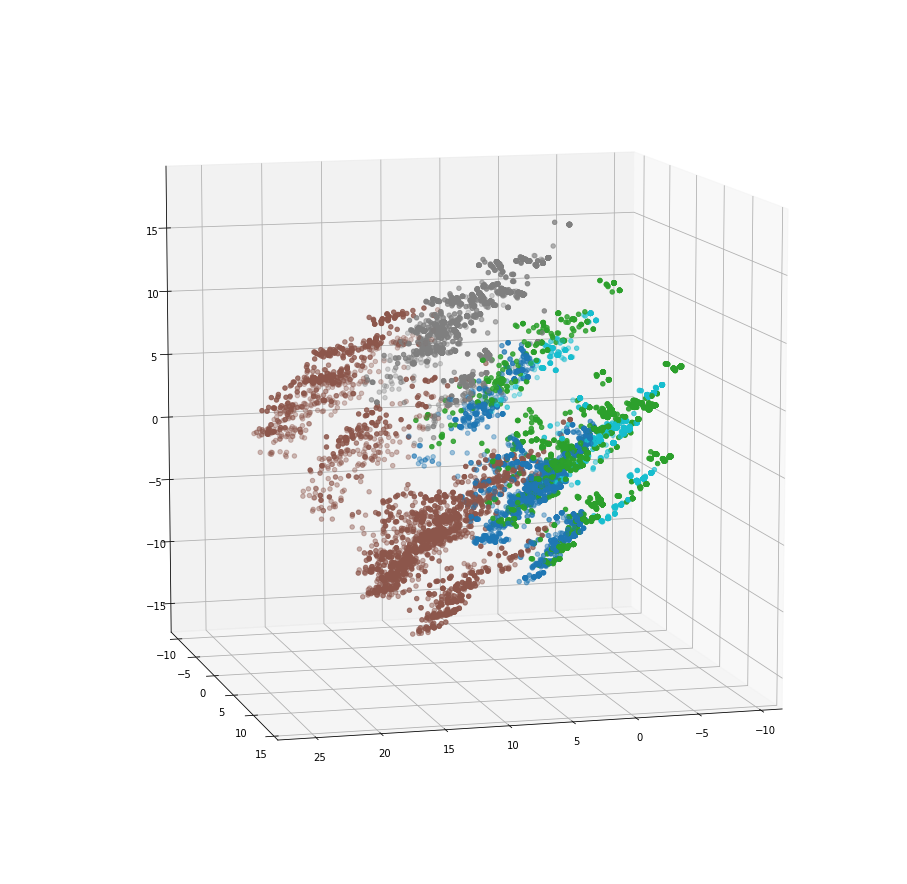

In [87]:
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result[0], result[1], result[2], c=result['cluster'], cmap=cmap)

# plt.scatter(result[0], result[1], c=result['cluster'], projection=3D);
cmap = plt.cm.tab10

# for angle in range(0, 360):
ax.view_init(10, 75)

plt.savefig('figures/pca1', dpi=300, bbox_inches='tight')
plt.draw()

### Get biggest contributer for each principal component

In [52]:
#pca.components_

In [53]:
pca.components_[0].max()

0.28578712541844975

In [54]:
np.where(pca.components_[0] == pca.components_[0].max())

(array([9]),)

In [55]:
data_dummies_drop_normalized.columns[9]

'When: Time of day_Night'

In [56]:
pca.components_[1].max()

0.6129006303300003

In [57]:
np.where(pca.components_[1] == pca.components_[1].max())

(array([60]),)

In [58]:
data_dummies_drop_normalized.columns[60]

'type_medium_airport'

In [59]:
pca.components_[3].max()

0.5835553046845701

In [60]:
np.where(pca.components_[3] == pca.components_[3].max())

(array([50]),)

In [61]:
data_dummies_drop_normalized.columns[50]

'Wildlife: Species Order_Perching Birds'

### Exploration and visualization of biggest contributors to each principal component

In [62]:
crosstab_time = pd.crosstab(data_mode.clusters, data_mode['When: Time of day'], normalize = 'columns')

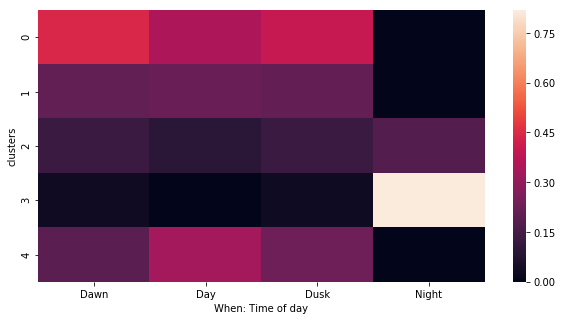

In [88]:
fig, ax = plt.subplots(figsize=(10,5))

sns.heatmap(crosstab_time, ax=ax)

plt.savefig('figures/heatmap_time.png', dpi=1000, bbox_inches='tight');

In [64]:
crosstab_type = pd.crosstab(data_mode.clusters, data_mode['type'], normalize = 'columns')

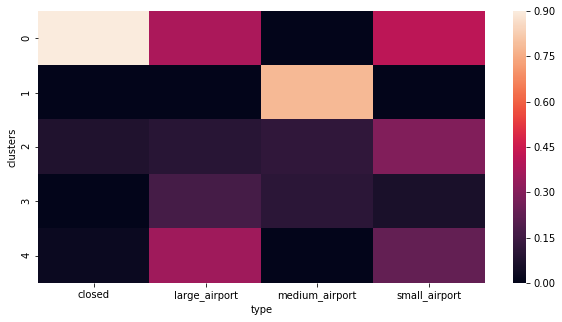

In [89]:
fig, ax = plt.subplots(figsize=(10,5)) 
sns.heatmap(crosstab_type, ax=ax)

plt.savefig('figures/heatmap_type.png', dpi=1000, bbox_inches='tight');

In [66]:
SpeciesOrder_total = (pd.crosstab(data_mode['Wildlife: Species Order'],data_mode.clusters).sum(axis=1))
crosstab = pd.crosstab(data_mode.clusters, data_mode['Wildlife: Species Order'], normalize = 'columns')

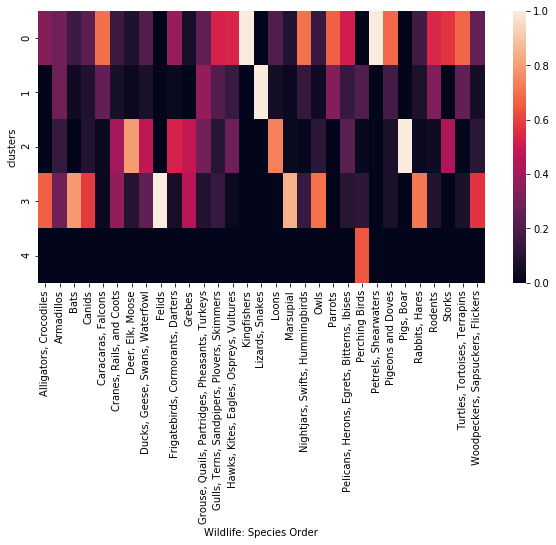

In [90]:
fig, ax = plt.subplots(figsize=(10,5)) 
sns.heatmap(crosstab, ax=ax)

plt.savefig('figures/heatmap_species.png', dpi=1000, bbox_inches='tight');

### Map clusters geographically

In [80]:
data['clusters'] = kmeans.labels_

In [81]:
geometry = [Point(xy) for xy in zip(data['Longitude'], data['Latitude'])]
#geometry[:3]

In [82]:
crs = {'init': 'epsg:4326'}

In [83]:
geo_df = gpd.GeoDataFrame(data, crs = crs, geometry = geometry)

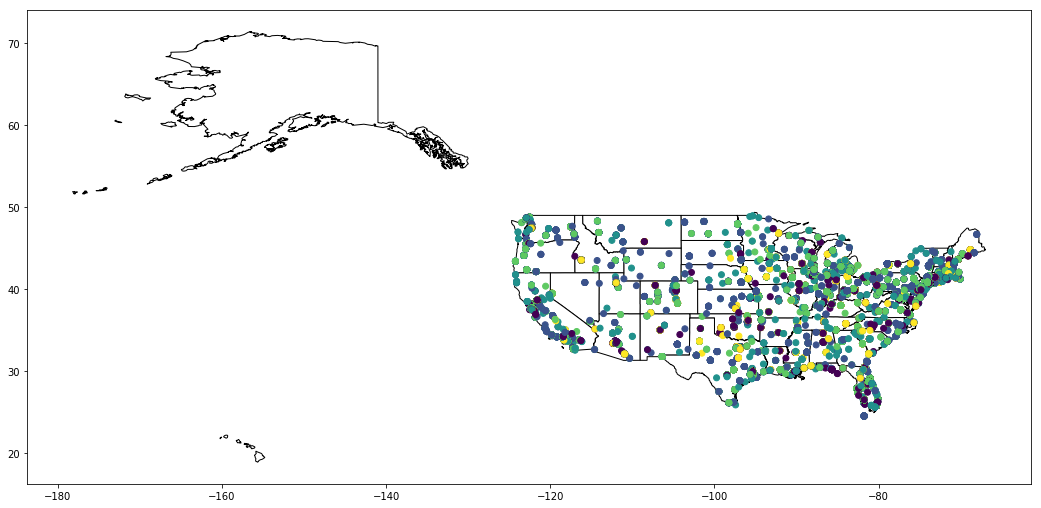

In [91]:
map = gpd.read_file('states_21basic/states.shp')
ax = map.plot(
    color='white', edgecolor='black', figsize=(18,18))

geo_df.plot(ax=ax, c=data['clusters'])

plt.savefig('figures/kmeans_clusters.png', dpi=300, bbox_inches='tight')
plt.show()